# Colorstream
### Processing: cooking greens from yellows and blues

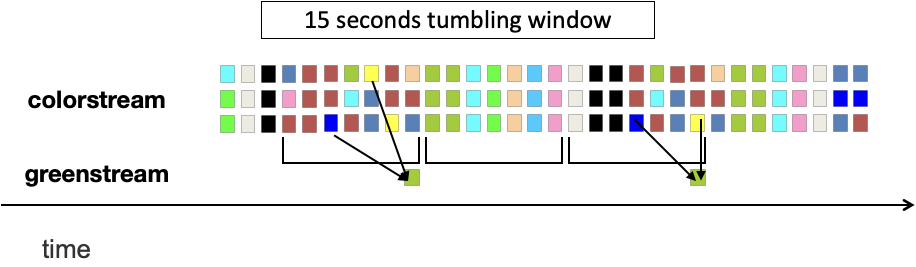

In [1]:
from IPython.display import Image
Image(filename="./images/cooking-greens.png")

### Inspect the sources

- a description of the stream is available at [http://colorstream:8080/colors](http://colorstream:8080/colors)
- the stream can be consumed via websocket at [ws://colorstream:5555](ws://colorstream:5555)

### Import rsplib and initialize the RSPEngine

In [2]:
from rsplib import RSPEngine

In [3]:
jasper = RSPEngine("http://jasper:8181/jasper")

### Define the query, specifing the query id, the t-box and the body of the query

In [4]:
qid  = 'green'

In [5]:
tbox = 'https://linkeddata.stream/ontologies/colors.owl'

In [6]:
body = '''
    CONSTRUCT { 
        ?green a <http://www.streamreasoning.org/ontologies/2018/9/colors#Green> ; 
            <http://www.streamreasoning.org/ontologies/2018/9/colors#from> ?yellow , ?blue .
    }
    FROM NAMED WINDOW <colorwindow> ON <http://colorstream:8080/colors> [RANGE PT15S STEP PT15S]
    WHERE {
        { WINDOW <colorwindow> { ?yellow a <http://www.streamreasoning.org/ontologies/2018/9/colors#Yellow> . } }
            UNION
        { WINDOW <colorwindow> { ?blue a <http://www.streamreasoning.org/ontologies/2018/9/colors#Blue> .} }

        BIND( UUID() as ?green )
    }
    '''

In [7]:
green_query = jasper.create(qid, body, tbox)

In [8]:
green_query.sources()

[GET http://colorstream:8080/colors]

### The stream has no endpoint


In [9]:
green_query.stream().endpoints()

[]

### Create a stream endpoint


In [10]:
response = jasper.expose(qid, 'WEBSOCKET')

In [11]:
jasper.streams()

[http://jasper:8181/jasper/streams/green, http://colorstream:8080/colors]

### Inspect and call the response endpoints

In [12]:
response.endpoints()

[GET ws://jasper:8182/jasper/streams/green/observers/810254591]

In [13]:
output = response.endpoints()[0].call()
output

{
    "@graph": [
        {
            "@id": "urn:uuid:01a80298-280b-4a1c-8e23-a74510b72451",
            "@type": "http://www.streamreasoning.org/ontologies/2018/9/colors#Green",
            "from": "http://jasper:8181/e693d4b5-4708-41dc-81c6-c3b95ed65130"
        },
        {
            "@id": "urn:uuid:03e17eea-ffd6-45c4-8d57-a46d0e8425b2",
            "@type": "http://www.streamreasoning.org/ontologies/2018/9/colors#Green",
            "from": "http://jasper:8181/05970314-dac2-4f5a-a240-fb53c23e350f"
        },
        {
            "@id": "urn:uuid:0951bfea-6966-4518-81a9-2f6e7de4c1be",
            "@type": "http://www.streamreasoning.org/ontologies/2018/9/colors#Green",
            "from": "http://jasper:8181/8949fa86-a770-40ab-8c78-f7bae7ff6ad5"
        },
        {
            "@id": "urn:uuid:11f2e775-9b30-447d-a6e9-61ec3e31d719",
            "@type": "http://www.streamreasoning.org/ontologies/2018/9/colors#Green",
            "from": "http://jasper:8181/56fa597a-7053-4fd0-

In [14]:
jasper.delete(qid)

{
    "@id": "queries/green",
    "@type": "vprov:Task",
    "prov:generated": {
        "@id": "streams/green"
    },
    "prov:uses": {
        "@id": "http://colorstream:8080/colors"
    },
    "@context": {
        "@base": "http://jasper:8181/jasper/",
        "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
        "vsd": "http://w3id.org/rsp/vocals-sd#",
        "vocals": "http://w3id.org/rsp/vocals#",
        "xsd": "http://www.w3.org/2001/XMLSchema#",
        "format": "http://www.w3.org/ns/formats/",
        "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
        "vprov": "http://w3id.org/rsp/vocals-prov#",
        "dcat": "http://www.w3.org/ns/dcat#",
        "prov": "http://www.w3.org/ns/prov#"
    }
}